In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import plotly.express as px
import warnings
warnings.simplefilter('ignore')

In [2]:
def dataset (data):
    print("Brief Data".center(60, '~'))
    print('DTYPE INFO'.center(70,'~'))
    print(data.info())
    print('Brief Describe'.center(70, '~'))
    print(data.describe())
    print('NULL DATA:')
    print(data.isnull().sum())
    print('Duplicated:')
    print(data.duplicated().sum())
    print('Unique:')
    print(data.nunique().sum())

In [3]:
df = pd.read_csv('WineQT.csv')
dataset(df)

~~~~~~~~~~~~~~~~~~~~~~~~~Brief Data~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DTYPE INFO~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int6

In [4]:
from scipy import stats
def corr_pval(dataframe, x_, y_):
    corr, p = stats.pearsonr(x = dataframe[x_], y = dataframe[y_])
    print_corr = print('Correlation value:', corr)
    print_p= print('P-value:', round(p,5))
    return print_corr, print_p

In [5]:
corr_pval(df, 'alcohol', 'quality')

Correlation value: 0.4848662118085134
P-value: 0.0


(None, None)

In [6]:
df2=df.copy()
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [7]:
df2.drop('Id', axis = 1, inplace = True)
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Outlier Treatment 

In [8]:
def outlier(dataframe, feature):
    q1 = dataframe[feature].quantile(0.25)
    q3 = dataframe[feature].quantile(0.75)
    iqr = q3-q1
    low = q1-(iqr*1.5)
    high = q3 + (iqr*1.5)
    return round (low,3), round(high,3)
for col in df2.columns:
    print(col, outlier(df2,col))

fixed acidity (4.1, 12.1)
volatile acidity (0.021, 1.011)
citric acid (-0.405, 0.915)
residual sugar (0.85, 3.65)
chlorides (0.04, 0.12)
free sulfur dioxide (-14.0, 42.0)
total sulfur dioxide (-39.0, 121.0)
density (0.992, 1.001)
pH (2.913, 3.692)
sulphates (0.28, 1.0)
alcohol (7.1, 13.5)
quality (3.5, 7.5)


In [9]:
for col in df2.columns:
    low, high =  outlier(df2,col)
    low_outlier = np.array(df2[col] <= low)
    high_outlier = np.array(df2[col] >= high)
    print(f'Outlier (low bound) of {col}',low_outlier.sum())
    print(f'Outlier (high bound) of {col}',high_outlier.sum())

Outlier (low bound) of fixed acidity 0
Outlier (high bound) of fixed acidity 44
Outlier (low bound) of volatile acidity 0
Outlier (high bound) of volatile acidity 14
Outlier (low bound) of citric acid 0
Outlier (high bound) of citric acid 1
Outlier (low bound) of residual sugar 0
Outlier (high bound) of residual sugar 111
Outlier (low bound) of chlorides 8
Outlier (high bound) of chlorides 69
Outlier (low bound) of free sulfur dioxide 0
Outlier (high bound) of free sulfur dioxide 21
Outlier (low bound) of total sulfur dioxide 0
Outlier (high bound) of total sulfur dioxide 43
Outlier (low bound) of density 15
Outlier (high bound) of density 25
Outlier (low bound) of pH 8
Outlier (high bound) of pH 12
Outlier (low bound) of sulphates 0
Outlier (high bound) of sulphates 43
Outlier (low bound) of alcohol 0
Outlier (high bound) of alcohol 12
Outlier (low bound) of quality 6
Outlier (high bound) of quality 16


In [10]:
##### use classification
from sklearn.preprocessing import LabelEncoder,StandardScaler
bins = (2,6.5,8)
wine = ['bad','good']
df2['quality'] = pd.cut(df2['quality'], bins = bins, labels=wine)
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,bad
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,bad
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,bad


In [11]:
encode = LabelEncoder()
df2['quality_code'] = encode.fit_transform(df2['quality'])

In [12]:
df2[['quality','quality_code']].value_counts()

quality  quality_code
bad      0               984
good     1               159
dtype: int64

In [13]:
df2[df2['quality']==1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_code


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
X = df2.drop(['quality','quality_code'], axis = 1)
y = df2['quality_code']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=20)

In [15]:
X_train.shape

(857, 11)

In [16]:
y_train.shape

(857,)

In [17]:
X_test.shape

(286, 11)

In [18]:
y_test.shape

(286,)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_ssc = sc.fit_transform(X_train)
X_test_ssc = sc.fit_transform(X_test)

In [20]:
logreg = LogisticRegression()
logreg.fit(X_train_ssc, y_train)
model_pred = logreg.predict(X_test_ssc)
resultdata = pd.DataFrame(model_pred, columns=['Data Predict'])
resultdata

,Data Predict
0,0
1,0
2,0
3,0
4,0
...,...
281,1
282,0
283,0
284,0


accuracy score: 0.8881118881118881
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       246
           1       0.65      0.42      0.52        40

    accuracy                           0.89       286
   macro avg       0.78      0.69      0.73       286
weighted avg       0.88      0.89      0.88       286



(None, None)

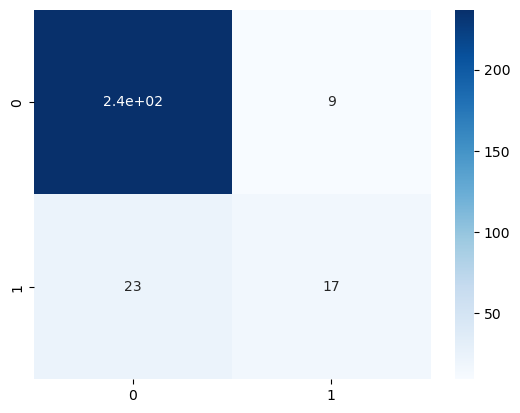

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
def score(true_score,predict=model_pred):
    acc = accuracy_score(true_score, predict)
    cls_report = classification_report(true_score, predict)
    print_ac = print('accuracy score:', acc)
    print_cls = print(cls_report)
    sns.heatmap(confusion_matrix(true_score, predict),  cmap= 'Blues', annot = True)
    plt.savefig('conf matrix of logreg', dpi=120)
    return print_ac,print_cls
score(y_test)

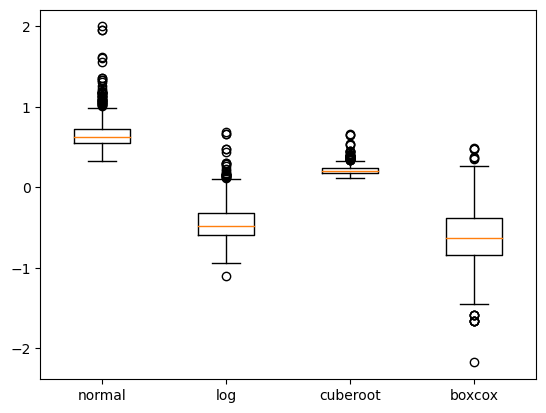

In [29]:
from scipy.stats import boxcox
df3 = df2.copy()
dist_normal = df3['sulphates']
dist_log = np.log(df3['sulphates'])
cube_root = df3['sulphates']**1/3
df3['sulphates_boxcox'], fitted_lambda = boxcox(df3['sulphates'])
data_plot = [dist_normal,dist_log,cube_root,df3['sulphates_boxcox']]

fig = plt.figure()
ax = fig.add_subplot(111)

bp = ax.boxplot(data_plot,labels =['normal','log','cuberoot','boxcox'])

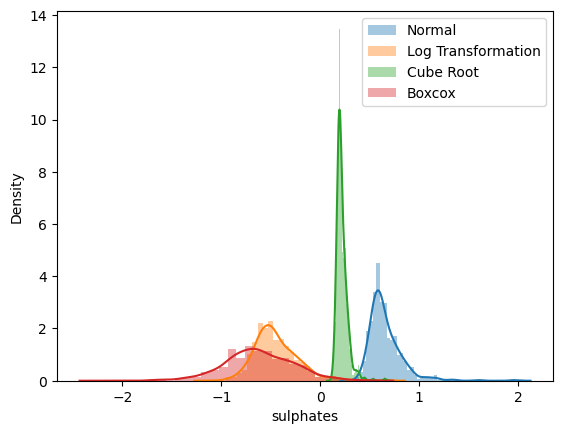

In [25]:
from scipy.stats import boxcox
sns.distplot(df2['sulphates'], kde = True, label='Normal')
sns.distplot(np.log(df2['sulphates']), kde = True, label = 'Log Transformation')
sns.distplot(df2['sulphates']**1/3, kde = True, label = 'Cube Root')
sns.distplot(df2['sulphates_boxcox'],kde=True, axlabel = 'sulphates', label = 'Boxcox')
plt.legend()

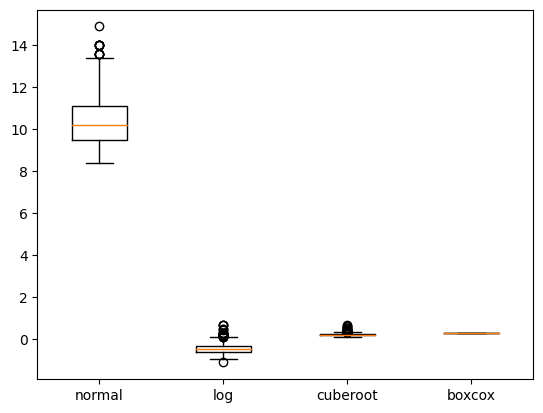

In [30]:
from scipy.stats import boxcox
dist_normal = df3['alcohol']
dist_log = np.log(df3['sulphates'])
cube_root = df3['sulphates']**1/3
df3['alcohol_boxcox'], fitted_lambda = boxcox(df3['alcohol'])
data_plot = [dist_normal,dist_log,cube_root,df3['alcohol_boxcox']]

fig = plt.figure()
ax = fig.add_subplot(111)

bp = ax.boxplot(data_plot,labels =['normal','log','cuberoot','boxcox'])

In [26]:
low, high =  outlier(df2,'sulphates_boxcox')
low_outlier = np.array(df2['sulphates_boxcox'] <= low)
high_outlier = np.array(df2['sulphates_boxcox'] >= high)
print(f'Outlier (low bound) of sulphates_boxcox',low_outlier.sum())
print(f'Outlier (high bound) of sulphates_boxcox',high_outlier.sum())

Outlier (low bound) of sulphates_boxcox 10
Outlier (high bound) of sulphates_boxcox 6


Low wine: AUC = 0.500
High wine: AUC = 0.898


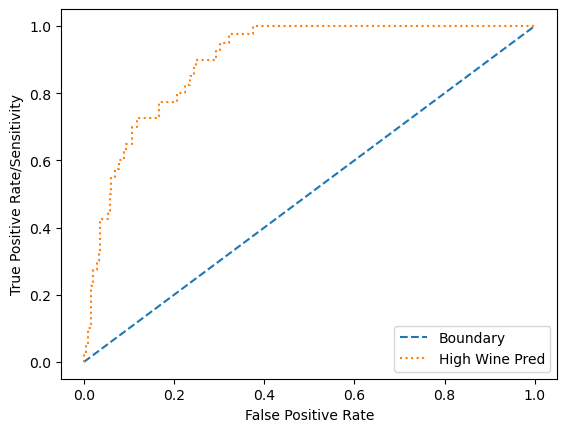

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

# train, predict probability, and keeps probabilities for positive outcome only
lr_proba = logreg.predict_proba(X_test_ssc)
lr_high_wine = lr_proba[:,1]

#generate low wine prediction
lr_low_wine =[0 for _ in range(len(y_test))]

# calculate score
low_wine_auc = roc_auc_score(y_test,lr_low_wine)
high_wine_auc = roc_auc_score(y_test,lr_high_wine)

# Summarize score
print('Low wine: AUC = %.3f'%(low_wine_auc))
print('High wine: AUC = %.3f'%(high_wine_auc))

#calculate roc curve
low_wine_fpr,low_wine_tpr,_ = roc_curve(y_test,lr_low_wine)
high_wine_fpr,high_wine_tpr,_ = roc_curve(y_test,lr_high_wine)

#plot the roc curve for the model
plt.plot(low_wine_fpr, low_wine_tpr, linestyle = '--', label = 'Boundary')
plt.plot(high_wine_fpr, high_wine_tpr, linestyle =':', label = 'High Wine Pred')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate/Sensitivity')

plt.legend()
plt.savefig('logreg graph', dpi  = 120)